# Plotting with seaborn

In this notebook, we will explore our data further using seaborn for some fancy plotting. Based on these insights, we will do some exploratory statistical analysis later.

In [2]:
import numpy, pandas
import matplotlib.pyplot as pl
import seaborn
%matplotlib inline

seaborn.set(rc={'figure.figsize':(12,8)})

In [3]:
dataset = pandas.read_csv("final_dataset.csv")

dataset.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,FL_DATE,OP_UNIQUE_CARRIER,AIRLINE_NAME,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT
0,2019,2019-10-13,AS,Alaska Airlines Inc.,N524VA,LAS,"Las Vegas, NV",NV,LAX,"Los Angeles, CA",...,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2019-10-13,AS,Alaska Airlines Inc.,N521VA,SEA,"Seattle, WA",WA,SNA,"Santa Ana, CA",...,978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2019-10-13,AS,Alaska Airlines Inc.,N529VA,BUR,"Burbank, CA",CA,SEA,"Seattle, WA",...,937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,2019-10-13,AS,Alaska Airlines Inc.,N528VA,PDX,"Portland, OR",OR,PSP,"Palm Springs, CA",...,873.0,0.0,0.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019,2019-10-13,AS,Alaska Airlines Inc.,N529VA,SEA,"Seattle, WA",WA,BUR,"Burbank, CA",...,937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(dataset.shape)

col_names = dataset.columns

print(col_names)

(692944, 29)
Index(['YEAR', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'AIRLINE_NAME', 'TAIL_NUM',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV_REACHED_DEST',
       'DIV_ARR_DELAY', 'DIV_DISTANCE', 'DIV1_AIRPORT'],
      dtype='object')


## 1. Scatter plots

Let's start with a scatter plot, which we saw in the previous chapter using built-in `pandas` methods.

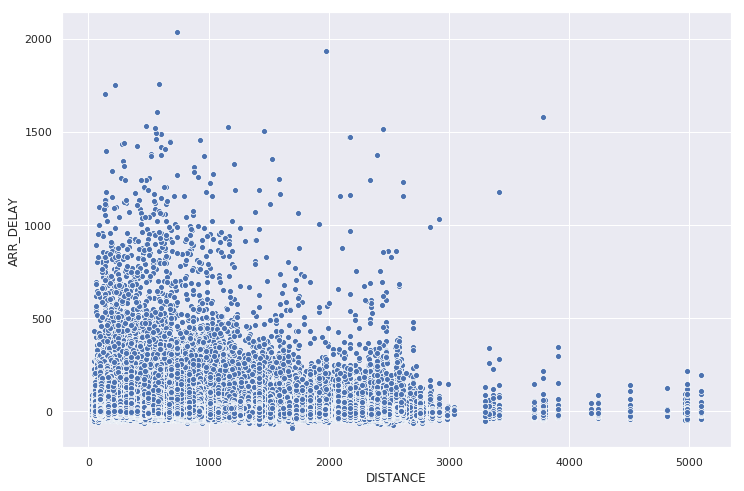

In [6]:
seaborn.scatterplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset)

pl.show()

We can represent a third dimension of information in the above plot!

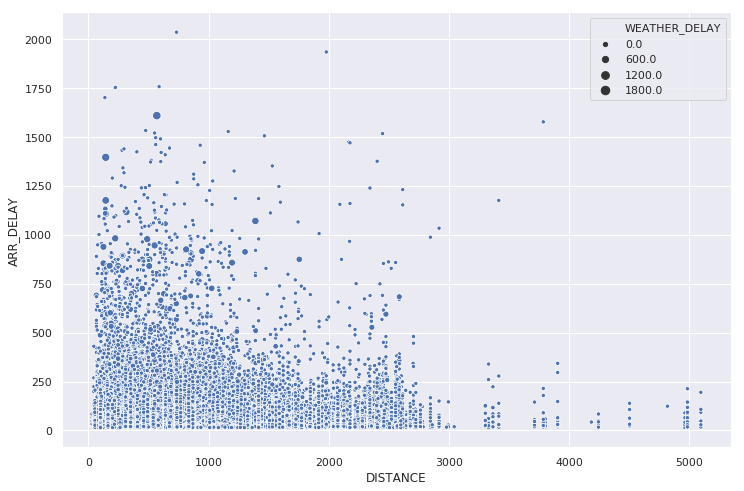

In [7]:
seaborn.scatterplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset, size = 'WEATHER_DELAY')

pl.show()

We can add a fourth dimesion by using colors on this plot

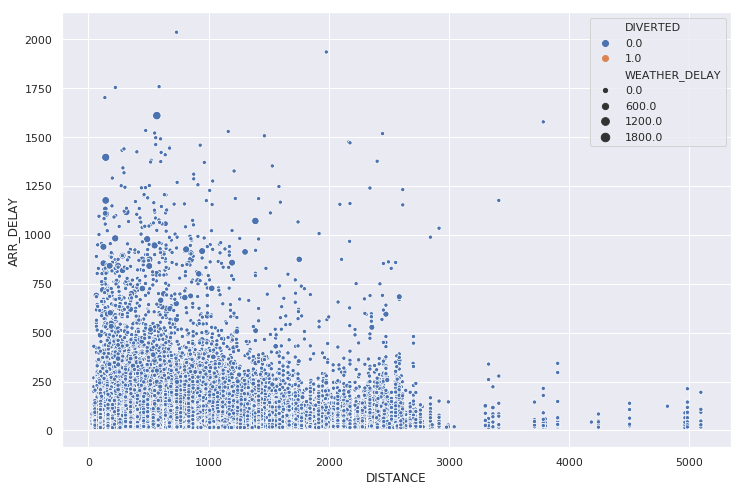

In [11]:
seaborn.scatterplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset, 
                    size = 'WEATHER_DELAY', hue = 'DIVERTED')

pl.show()

# 2. Distplot and histogram

We can make histograms, as well as fit them with a kernel density estimation (KDE) method built into seaborn. Unfortunately, there is no way to extract this fit from seaborn as of now.